# Tugas 1 Menghitung Jarak Data

Nama : Achmad Ilham Firmansyah                                                   

NIM : 210411100127

In [ ]:
import pandas as pd
import numpy as np
data = pd.read_csv('https://gist.githubusercontent.com/ach-Ilhamf/81dc8801c7f469a217d54e39598f3e55/raw/c2afcfc35f9c7950e930eb9aa8e82a454725da52/StudentsPerformance.csv')
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [ ]:
#Menampilkan seluruh kolom
data.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

## Menyeleksi Fitur



1.   Gender
2.   Lunch



In [ ]:
data[['gender', 'lunch']].head(5)

,gender,lunch
0,female,standard
1,female,standard
2,female,standard
3,male,free/reduced
4,male,standard


## Mengubah values ke 1/0 pada kolom 'gender'

Jika value adalah 'female' maka diubah 1

Jika value adalah 'male' maka diubah 0

In [1]:
gender_female = "female"
gender_male = "male"

value_one = 1
value_zero = 0

def gender_binary(gender):
    return value_one if gender == gender_male else value_zero

## Mengubah values ke 1/0 pada kolom 'lunch'

Jika value adalah 'paid' maka diubah 1

Jika value adalah 'free' maka diubah 0

In [ ]:
paid_lunch = "standart"
free_lunch = "free/reduced"

value_one = 1
value_zero = 0

def lunch_binary(lunch):
    return value_one if lunch == free_lunch else value_zero

In [ ]:
# Update semua value
data["gender"] = data["gender"].apply(gender_binary)
data["lunch"] = data["lunch"].apply(lunch_binary)

In [ ]:
data[['gender', 'lunch']].head(5)

,gender,lunch
0,0,0
1,0,0
2,0,0
3,1,1
4,1,0


In [ ]:
# variabel konstan
DECREMENT_BY_ONE = 1
INCREMENT_BY_ONE = 1

PROBALITY_TABLE_VALUE = {
    "q" : (1,1),
    "r" : (1,0),
    "s" : (0,1),
    "t" : (0,0),
}

In [ ]:
def get_series(data, idx, series):
    return data.loc[(idx), series]

In [ ]:
def dissimilarity_dataset(data, series_index = [], series = []):
    first_series = get_series(data, series_index[0], series)
    second_series = get_series(data, series_index[1], series)
    dataset = pd.concat([first_series,second_series],axis=1)
    return dataset.T

In [ ]:
dissimilarity_dataset(data, [1,2], ["gender", "lunch"]).T

,1,2
gender,0,0
lunch,0,0


In [ ]:
data.loc[0:4, ["gender", "lunch"]]

,gender,lunch
0,0,0
1,0,0
2,0,0
3,1,1
4,1,0


In [ ]:
def count_probality_value(studentdata, start_index = 0, last_index = 1):

    PROBALITY_VALUE = {"q" : 0, "r" : 0, "s" : 0, "t" : 0}

    column_range = studentdata.shape[1]

    for column in range(column_range):
        for value in PROBALITY_TABLE_VALUE:
            item = list((tuple(studentdata.loc[(start_index):(last_index), studentdata.columns[column]]) == PROBALITY_TABLE_VALUE[value], value))
            if item[0] == True:
                if item[1] == "q":
                    PROBALITY_VALUE["q"] += 1
                if item[1] == "r":
                    PROBALITY_VALUE["r"] += 1
                if item[1] == "s":
                    PROBALITY_VALUE["s"] += 1
                if item[1] == "t":
                    PROBALITY_VALUE["t"] += 1

    return PROBALITY_VALUE

In [ ]:
# dimensi (1,2)
dimensi_1_2 = dissimilarity_dataset(data, [1,2], ["gender", "lunch"])

In [ ]:
probality_d_1_2 = count_probality_value(dimensi_1_2, 1, 2)

In [ ]:
# dimensi (1,3)
dimensi_1_3 = dissimilarity_dataset(data, [1,3], ["gender", "lunch"])

In [ ]:
probality_d_1_3 = count_probality_value(dimensi_1_3, 1, 3)

In [ ]:
# dimensi (1,4)
dimensi_1_4 = dissimilarity_dataset(data, [1,4], ["gender", "lunch"])

In [ ]:
probality_d_1_4 = count_probality_value(dimensi_1_4, 1, 4)

## Perhitungan Rumus Dengan Metode Dissmilitary Binary Symetric

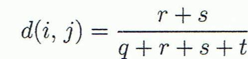

In [ ]:
def dissimilarity_binary_symetric_distance(probality_value):
  
    return (probality_value["r"] + probality_value["s"]) / (probality_value["q"] + probality_value["r"] + probality_value["s"] + probality_value["t"])

In [ ]:
dimensi_1_2 = dissimilarity_binary_symetric_distance(probality_d_1_2)
dimensi_1_3 = dissimilarity_binary_symetric_distance(probality_d_1_3)
dimensi_1_4 = dissimilarity_binary_symetric_distance(probality_d_1_4)

In [ ]:
#d1 dan d2

dimensi_1_2

0.0

In [ ]:
# d1 dan d4

dimensi_1_3

1.0

In [ ]:
# d1 dan d4

dimensi_1_4

0.5